# This is the first step in reproducing the cluster analysis from Sara and David following Amini et al 2019
https://doi.org/10.1007/s00382-018-4409-7

This program:
1. Reads in Z500 and U250 from ERA-Interim for Dec-Jan-Feb 1980/81 to 2014/15
* Data are located in: 
`/shared/working/rean/era-interim/daily/data/yyyy/ei.oper.an.pl.regn128cm.yyyymmddhh`
2. Subsets to the PNA region
* Defined as: 150-300E; 20-80N
3. Extracts only DJF 1980/81 - 2014/15
4. Interpolates the data to a 126x64 Gaussian Grid
5. Makes 5-day running means
6. Writes datasets out to a netcdf files containing both variables 
* Output file is located in: `/project/predictability/kpegion/wxregimes/era-interim/erai.z500_u250_pna_5dyrm_DJF.1980-2015.nc`

In [1]:
import warnings

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [2]:
def preprocZ(ds):

    # Extract PNA region and 500hPa level
    ds=ds.sel(isobaricInhPa=500,latitude=slice(80,20),longitude=slice(150,300))

    # Create a new xarray dataset for z500
    ds_tmp=xr.DataArray(ds['z'],
                        coords={'lat':ds['latitude'].values,
                                'lon': ds['longitude'].values},
                            dims=['lat','lon'])        
    ds_tmp=ds_tmp.to_dataset(name='z500')
    
    # Interpolate data to coarser grid
#    ds_new_grid=xr.open_dataset('tempgaussian.128x64.nc')
#    ds_new_grid=ds_new_grid.rename({'temp':'z500'}).sel(lat=slice(80,20),lon=slice(150,300))
#    ds=ds_tmp.interp_like(ds_new_grid)
    
    ds=ds_tmp
    return ds

In [3]:
# Turn off all those deprecation warnings
#import warnings
#warnings.filterwarnings("ignore")

### Define file path and names

In [4]:
# Input
path='/shared/working/rean/era-interim/daily/data/'
fname='ei.oper.an.pl.regn128cm.'

# Output
out_path='/project/predictability/kpegion/wxregimes/era-interim/'
ofname='erai.z500_u250_pna_DJF.1980-2015.nc'
outfile=out_path+ofname

In [5]:
# Months list
mnums=['12']

# Dates
sdate='19801201'
#edate='20151231'
edate='19801231'

# Years List
yrs_list=np.arange(1980,1981)
yrs_list

array([1980])

### Read in the files for all months and years, and prepocess to subset data for Z500hPa and U250 in the PNA region & interpolate to coarser grid

In [6]:
# Create empty list to append data for each month
#ds_Z_months=[]

# Loop over months, get list of files and read in data for each month
for mnum in mnums:
        
    print(mnum)
    
    # Get all the filenames for this month for all years
    fnamesZ = [f'{path}{year}/{fname}{year}{mnum}*' for year in yrs_list]       
   
    # Create list of all filenames for this month, and all years
    filesZ=[]
    for files in fnamesZ:
        f2=glob.glob(files)
        for f in f2:
            filesZ.append(f)
    filesZ=sorted(filesZ)
    print(filesZ)
    # Read Geopotential Height (Z) data           
    ds_Z=xr.open_mfdataset(filesZ,engine='cfgrib',
                           combine='nested',concat_dim=['time'],
                           backend_kwargs={'indexpath':'',
                                           'filter_by_keys':{'name': 'Geopotential'}},
                           preprocess=preprocZ)
 
    
    # Create dates for time assign to time dimension
#    dates_all=pd.date_range(start=sdate,end=edate,freq='D')
#    print(dates_all)
#    djf_dates=dates_all[(dates_all.month==int(mnum))]
#    print(djf_dates)
#    ds_Z['time']=djf_dates
        
    # Append the latest month to the list
#    ds_Z_months.append(ds_Z)
        
# Combine the months into the init dimension
#ds_Z_months = xr.combine_nested(ds_Z_months, concat_dim='time')

12
['/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120100', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120200', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120300', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120400', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120500', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120600', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120700', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120800', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980120900', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980121000', '/shared/working/rean/era-interim/daily/data/1980/ei.oper.an.pl.regn128cm.1980121100', '/shared/working/rean/era-interim/daily

In [7]:
ds_Z

<xarray.Dataset>
Dimensions:  (lat: 85, lon: 213, time: 31)
Coordinates:
  * lon      (lon) float64 150.5 151.2 151.9 152.6 ... 297.4 298.1 298.8 299.5
  * lat      (lat) float64 79.65 78.95 78.25 77.54 ... 22.81 22.11 21.4 20.7
Dimensions without coordinates: time
Data variables:
    z500     (time, lat, lon) float32 50007.93 49985.93 ... 57351.645 57364.145

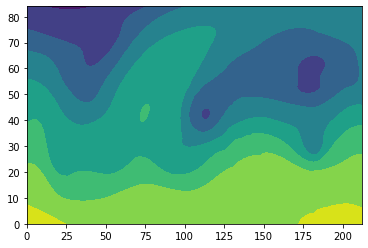

In [9]:
plt.contourf((ds_Z['z500'][2,::-1,:])/9.81)